# TabularDNN

Use `ssh -L 8080:localhost:8080 username@example.com` to port forward 8080 on remote which will be running jupyter notebook to 8080 local then run `jupyter-notebook --no-browser --port 8080 .` on remote. After jupyter comes up use the provided links in terminal to open up jupyter notebook on your local browser. 

Use `/usr/bin/python3.11 -m venv venvName` to make venv. Use `source venvName/bin/activate` to enter venv. Python will be 3.11 when used either `python` or `python3`. To get out of venv use `deactivate`. `rm -r venvName` to delete venv.

Use `pip install tensorflow[and-cuda]` to install and check with `python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"` to see if GPU is set up. If GPU devices are shown then everything is OK.

Use `pip install jupyter` to have jupyter-notebook in venv. Check with `which jupyter` to see if correct jupyter is used. Use `python -m ipykernel install --user --name=venvName` to add venv to jupyter kernels. When creating new notebook instead of using python3 use venvName. To remove venv kernel from jupyter use `jupyter kernelspec remove venvName`

In [681]:
! python --version

Python 3.11.7


In [682]:
from datetime import datetime
import json

In [683]:
readmeEntry = "\n\n---\n\n"
readmeEntry += "## Parameters \n\n"
with open("./tabularDNN.params.json", mode = "r", encoding = "utf-8") as f:
    readmeEntry += f"```json\n{f.read()}\n```\n"

In [684]:
with open("./tabularDNN.params.json", mode = "r", encoding = "utf-8") as f:
    data = json.load(f)
    input_cols = data["params"]["input_features"]
    output_cols = data["params"]["output_features"]
    hiddenLayers = data["params"]["hidden_layers"]
    actFunction = data["params"]["activation"]
    lossFunction = data["params"]["loss"]
    optimizerMethod = data["params"]["optimizer"]
    learningRate = data["params"]["learning_rate"]
    perfMetrics = data["params"]["metrics"]
    normMethod = data["params"]["normalization_method"]
    batchSize = data["params"]["batch_size"]
    epochs = data["params"]["epochs"]

In [685]:
import pandas as pd
from sklearn import preprocessing
print(f"Pandas Version: {pd.__version__}")

Pandas Version: 2.2.3


In [686]:
df = pd.read_csv("dataset/AQI2.csv")
df.head()

,Date,Time,Temperature,Real Feel,Weather Status,Wind Gusts,Humidity,Indoor Humidity,Humidity Status,Dew Point,...,AQI,AQI-PM2.5,AQI-PM10,AQI-NO2,AQI-O3,Amount-PM2.5,Amount-PM10,Amount-NO2,Amount-O3,Filename
0,"WEDNESDAY, 16 OCTOBER",13:39,16,16,Mostly cloudy,9,0.72,0.54,Ideal Humidity,10,...,23,13,17,18,23,3,12,8,64,Seattle/67.png
1,"SUNDAY, 20 OCTOBER",14:24,19,18,Cloudy,25,0.67,0.63,Ideal Humidity,13,...,24,21,18,17,24,5,13,8,64,Seattle/209.png
2,"THURSDAY, 17 OCTOBER",17:30,11,12,Mostly cloudy,6,0.80,0.46,Ideal Humidity,8,...,37,13,14,37,15,3,10,18,45,Seattle/95.png
3,"SUNDAY, 20 OCTOBER",00:26,16,15,Mostly cloudy,17,0.94,0.73,Slightly Humid,15,...,27,20,16,27,14,4,11,13,43,Seattle/180.png
4,"SUNDAY, 20 OCTOBER",15:24,18,17,Light rain,27,0.76,0.66,Slightly Humid,14,...,19,14,12,17,19,3,9,8,55,Seattle/210.png


In [687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3040 non-null   object 
 1   Time                3040 non-null   object 
 2   Temperature         3040 non-null   int64  
 3   Real Feel           3040 non-null   int64  
 4   Weather Status      3040 non-null   object 
 5   Wind Gusts          3040 non-null   int64  
 6   Humidity            3040 non-null   float64
 7   Indoor Humidity     3040 non-null   float64
 8   Humidity Status     3040 non-null   object 
 9   Dew Point           3040 non-null   int64  
 10  Pressure            3040 non-null   int64  
 11  Pressure Direction  3040 non-null   object 
 12  Cloud Cover         3040 non-null   float64
 13  Visibility          3040 non-null   float64
 14  Cloud Ceiling       3040 non-null   int64  
 15  AQI                 3040 non-null   int64  
 16  AQI-PM

In [688]:
input_df = df[input_cols]
input_df

,Date,Time,Temperature,Real Feel,Weather Status,Wind Gusts,Humidity,Indoor Humidity,Humidity Status,Dew Point,Pressure,Pressure Direction,Cloud Cover,Visibility,Cloud Ceiling
0,"WEDNESDAY, 16 OCTOBER",13:39,16,16,Mostly cloudy,9,0.72,0.54,Ideal Humidity,10,1015,↔,0.76,18.0,2700
1,"SUNDAY, 20 OCTOBER",14:24,19,18,Cloudy,25,0.67,0.63,Ideal Humidity,13,1010,↓,0.95,21.0,1900
2,"THURSDAY, 17 OCTOBER",17:30,11,12,Mostly cloudy,6,0.80,0.46,Ideal Humidity,8,1021,↑,0.76,21.0,12200
3,"SUNDAY, 20 OCTOBER",00:26,16,15,Mostly cloudy,17,0.94,0.73,Slightly Humid,15,1017,↓,0.81,15.0,700
4,"SUNDAY, 20 OCTOBER",15:24,18,17,Light rain,27,0.76,0.66,Slightly Humid,14,1010,↔,1.00,16.0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,"WEDNESDAY, 9 OCTOBER",11:32,30,32,Mostly sunny,47,0.55,0.55,Very Humid,20,1018,↔,0.28,16.0,9100
3036,"WEDNESDAY, 9 OCTOBER",15:31,30,29,Mostly cloudy,53,0.53,0.53,Very Humid,20,1015,↔,0.76,16.0,9100
3037,"WEDNESDAY, 9 OCTOBER",20:32,26,26,Mostly clear,35,0.70,0.70,Very Humid,20,1017,↑,0.25,16.0,9100
3038,"SATURDAY, 19 OCTOBER",13:06,30,33,Partly sunny,37,0.56,0.56,Very Humid,21,1018,↓,0.31,16.0,9100


In [689]:
output_df = df[output_cols]
output_df

,AQI-PM2.5,AQI-PM10,AQI-NO2,AQI-O3
0,13,17,18,23
1,21,18,17,24
2,13,14,37,15
3,20,16,27,14
4,14,12,17,19
...,...,...,...,...
3035,31,22,1,17
3036,34,24,1,16
3037,33,23,2,14
3038,30,21,1,15


In [690]:
# Handling Time and Date
def encodeDate(date, year = 2024):
    months = {
        "JANUARY": 1,
        "FEBURARY": 2,
        "MARCH": 3,
        "APRIL": 4,
        "MAY": 5,
        "JUNE": 6,
        "JULY": 7,
        "AUGUST": 8,
        "SEPTEMBER": 9,
        "OCTOBER": 10,
        "NOVEMBER": 11,
        "DECEMBER": 12
    }
    day, month = date.split(",")[1].strip().split(" ")
    return year * (10 ** 8) + months[month] * (10 ** 6) + int(day) * (10 ** 4)

def encodeTime(time):
    hour, minute = time.split(":")
    return int(hour) * (10 ** 2) + int(minute)

In [691]:
# TODO
# What if just Date or just Time is present in dataset --> The powers of 10 in the functions about change too!
if("Date" in input_cols and "Time" in input_cols):
    input_df["Date"] = input_df["Date"].apply(lambda date: encodeDate(date))
    input_df["Time"] = input_df["Time"].apply(lambda time: encodeTime(time))
    input_df["DateTime"] = input_df["Date"] + input_df["Time"]
    input_df = input_df.drop(["Date", "Time"], axis = 1)
input_df

/tmp/ipykernel_3241539/2332362377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df["Date"] = input_df["Date"].apply(lambda date: encodeDate(date))
/tmp/ipykernel_3241539/2332362377.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df["Time"] = input_df["Time"].apply(lambda time: encodeTime(time))
/tmp/ipykernel_3241539/2332362377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,Temperature,Real Feel,Weather Status,Wind Gusts,Humidity,Indoor Humidity,Humidity Status,Dew Point,Pressure,Pressure Direction,Cloud Cover,Visibility,Cloud Ceiling,DateTime
0,16,16,Mostly cloudy,9,0.72,0.54,Ideal Humidity,10,1015,↔,0.76,18.0,2700,202410161339
1,19,18,Cloudy,25,0.67,0.63,Ideal Humidity,13,1010,↓,0.95,21.0,1900,202410201424
2,11,12,Mostly cloudy,6,0.80,0.46,Ideal Humidity,8,1021,↑,0.76,21.0,12200,202410171730
3,16,15,Mostly cloudy,17,0.94,0.73,Slightly Humid,15,1017,↓,0.81,15.0,700,202410200026
4,18,17,Light rain,27,0.76,0.66,Slightly Humid,14,1010,↔,1.00,16.0,2100,202410201524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,30,32,Mostly sunny,47,0.55,0.55,Very Humid,20,1018,↔,0.28,16.0,9100,202410091132
3036,30,29,Mostly cloudy,53,0.53,0.53,Very Humid,20,1015,↔,0.76,16.0,9100,202410091531
3037,26,26,Mostly clear,35,0.70,0.70,Very Humid,20,1017,↑,0.25,16.0,9100,202410092032
3038,30,33,Partly sunny,37,0.56,0.56,Very Humid,21,1018,↓,0.31,16.0,9100,202410191306


In [692]:
# One-hot Encoding

# weatherStatus = pd.get_dummies(df["Weather Status"], dtype = float, drop_first = True)
# humidityStatus = pd.get_dummies(df["Humidity Status"], dtype = float, drop_first = True)
# pressureDirection = pd.get_dummies(df["Pressure Direction"], dtype = float, drop_first = True)

# print(f"Weather Status One-Hot Shape: f{weatherStatus.shape}")
# print(f"Humidity Status One-Hot Shape: f{humidityStatus.shape}")
# print(f"Pressure Direction One-Hot Shape: f{pressureDirection.shape}")

In [693]:
# input_df = input_df.drop(["Weather Status", "Humidity Status", "Pressure Direction"], axis = 1)
# input_df = pd.concat([input_df, weatherStatus, humidityStatus, pressureDirection], axis = 1)
# input_df

In [694]:
# Label Encoder
if("Weather Status" in input_cols and "Humidity Status" in input_cols and "Pressure Direction" in input_cols):
    labelEncoder = preprocessing.LabelEncoder()
    input_df["Weather Status"] = labelEncoder.fit_transform(input_df["Weather Status"])
    input_df["Humidity Status"] = labelEncoder.fit_transform(input_df["Humidity Status"])
    input_df["Pressure Direction"] = labelEncoder.fit_transform(input_df["Pressure Direction"])
    
    print(f"Weather Status Vals: {input_df['Weather Status'].unique()}")
    print(f"Humidity Status Vals: {input_df['Humidity Status'].unique()}")
    print(f"Pressure Direction Vals: {input_df['Pressure Direction'].unique()}")

Weather Status Vals: [10  3  6  9 12 13 17 11 14  1  2  0 16  5 18  4 15  8  7]
Humidity Status Vals: [4 6 5 1 2 0 3 8 7]
Pressure Direction Vals: [2 1 0]


In [695]:
# Used in training --> Conversion required for warning in normalization!
newTypes = {}
for col in input_df.columns:
    if(input_df[col].dtype == "int64"):
        newTypes[col] = "float64"

input_df = input_df.astype(newTypes)
input_df

,Temperature,Real Feel,Weather Status,Wind Gusts,Humidity,Indoor Humidity,Humidity Status,Dew Point,Pressure,Pressure Direction,Cloud Cover,Visibility,Cloud Ceiling,DateTime
0,16.0,16.0,10.0,9.0,0.72,0.54,4.0,10.0,1015.0,2.0,0.76,18.0,2700.0,2.024102e+11
1,19.0,18.0,3.0,25.0,0.67,0.63,4.0,13.0,1010.0,1.0,0.95,21.0,1900.0,2.024102e+11
2,11.0,12.0,10.0,6.0,0.80,0.46,4.0,8.0,1021.0,0.0,0.76,21.0,12200.0,2.024102e+11
3,16.0,15.0,10.0,17.0,0.94,0.73,6.0,15.0,1017.0,1.0,0.81,15.0,700.0,2.024102e+11
4,18.0,17.0,6.0,27.0,0.76,0.66,6.0,14.0,1010.0,2.0,1.00,16.0,2100.0,2.024102e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,30.0,32.0,11.0,47.0,0.55,0.55,8.0,20.0,1018.0,2.0,0.28,16.0,9100.0,2.024101e+11
3036,30.0,29.0,10.0,53.0,0.53,0.53,8.0,20.0,1015.0,2.0,0.76,16.0,9100.0,2.024101e+11
3037,26.0,26.0,9.0,35.0,0.70,0.70,8.0,20.0,1017.0,0.0,0.25,16.0,9100.0,2.024101e+11
3038,30.0,33.0,13.0,37.0,0.56,0.56,8.0,21.0,1018.0,1.0,0.31,16.0,9100.0,2.024102e+11


In [696]:
newTypes = {}
for col in output_df.columns:
    if(output_df[col].dtype == "int64"):
        newTypes[col] = "float64"

output_df = output_df.astype(newTypes)
output_df

,AQI-PM2.5,AQI-PM10,AQI-NO2,AQI-O3
0,13.0,17.0,18.0,23.0
1,21.0,18.0,17.0,24.0
2,13.0,14.0,37.0,15.0
3,20.0,16.0,27.0,14.0
4,14.0,12.0,17.0,19.0
...,...,...,...,...
3035,31.0,22.0,1.0,17.0
3036,34.0,24.0,1.0,16.0
3037,33.0,23.0,2.0,14.0
3038,30.0,21.0,1.0,15.0


In [697]:
pd.concat([input_df, output_df], axis = 1).corr()

,Temperature,Real Feel,Weather Status,Wind Gusts,Humidity,Indoor Humidity,Humidity Status,Dew Point,Pressure,Pressure Direction,Cloud Cover,Visibility,Cloud Ceiling,DateTime,AQI-PM2.5,AQI-PM10,AQI-NO2,AQI-O3
Temperature,1.000000,0.960821,0.291895,0.360842,-0.382643,0.378511,0.062329,0.584011,-0.448319,-0.007789,0.031589,0.014993,0.022030,-0.194701,0.033882,0.131809,-0.403311,0.598682
Real Feel,0.960821,1.000000,0.346596,0.220743,-0.345052,0.376454,0.030454,0.583236,-0.373045,0.004278,-0.037566,0.034332,0.087751,-0.193968,0.080371,0.157381,-0.349340,0.550158
Weather Status,0.291895,0.346596,1.000000,0.074849,-0.313323,-0.111417,-0.020400,-0.010622,-0.035739,-0.038232,-0.173912,0.062882,0.168121,-0.159779,-0.022805,0.070398,-0.157119,0.328953
Wind Gusts,0.360842,0.220743,0.074849,1.000000,-0.050683,0.259689,0.096121,0.312561,-0.370280,-0.078178,0.307407,-0.099740,-0.260899,-0.074540,-0.105157,-0.108159,-0.476061,0.225766
Humidity,-0.382643,-0.345052,-0.313323,-0.050683,1.000000,0.582734,0.118627,0.494080,-0.064123,-0.037746,0.426678,-0.297603,-0.398780,0.082864,0.186371,-0.212052,0.019609,-0.443320
Indoor Humidity,0.378511,0.376454,-0.111417,0.259689,0.582734,1.000000,0.136525,0.883230,-0.417061,-0.060195,0.451515,-0.235107,-0.355815,-0.017535,0.142224,-0.135169,-0.314099,0.004752
Humidity Status,0.062329,0.030454,-0.020400,0.096121,0.118627,0.136525,1.000000,0.185995,0.065813,0.028084,0.021172,-0.094717,-0.078449,-0.007457,0.017640,-0.034164,-0.051543,-0.013324
Dew Point,0.584011,0.583236,-0.010622,0.312561,0.494080,0.883230,0.185995,1.000000,-0.445170,-0.032880,0.380912,-0.243235,-0.303199,-0.102652,0.184529,-0.087555,-0.365777,0.158110
Pressure,-0.448319,-0.373045,-0.035739,-0.370280,-0.064123,-0.417061,0.065813,-0.445170,1.000000,0.091001,-0.468921,0.029067,0.337852,0.429451,0.161365,0.136445,0.455097,-0.247853
Pressure Direction,-0.007789,0.004278,-0.038232,-0.078178,-0.037746,-0.060195,0.028084,-0.032880,0.091001,1.000000,-0.099764,0.024416,0.060914,0.030118,0.070414,0.061045,0.111341,-0.033208


In [698]:
import keras
from sklearn.model_selection import KFold
import numpy as np
from matplotlib import pyplot as plt
print(f"Keras Version: {keras.__version__}")

Keras Version: 3.6.0


## Model

In [699]:
def get_model():
    inputs = keras.Input(shape = (input_df.shape[1],))
    for i, numNodes in enumerate(hiddenLayers):
        if(i == 0):
            x = keras.layers.Dense(numNodes, activation = actFunction)(inputs)
        else:
            x = keras.layers.Dense(numNodes, activation = actFunction)(x)
    outputs = keras.layers.Dense(output_df.shape[1])(x)

    if(lossFunction == "MAE"):
        lossFunc = keras.losses.MeanAbsoluteError()

    if(optimizerMethod == "Adam"):
        opt = keras.optimizers.Adam(learning_rate = learningRate)
    
    model = keras.Model(inputs = inputs, outputs = outputs, name = "TabularDNN")
    model.compile(
        loss = lossFunc,
        optimizer = opt,
        metrics = perfMetrics
    )
    return model

In [700]:
get_model().summary()

Model: "TabularDNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_109 (InputLayer)    │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_323 (Dense)               │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_324 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_325 (Dense)               │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412 (1.61 KB)

 Trainable params: 412 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

In [701]:
readmeEntry += f"### Number of model parameters: {get_model().count_params()}\n"

In [702]:
# keras.utils.plot_model(get_model(), show_shapes = True)

========================= Fold 1 =========================
Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 27.6626 - r2_score: -2.8060 - val_loss: 23.2271 - val_r2_score: -1.6741
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.2621 - r2_score: -2.0630 - val_loss: 13.1290 - val_r2_score: -0.0970
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 12.8405 - r2_score: -0.1579 - val_loss: 11.9720 - val_r2_score: 0.0995
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 11.3540 - r2_score: 0.1026 - val_loss: 11.7273 - val_r2_score: 0.1474
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.7697 - r2_score: 0.1825 - val_loss: 11.4472 - val_r2_score: 0.1796
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.2864 - r2_score: 0.2329 - val_loss: 11.3823 - val_r2_score: 0.1942
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.0213 - r2_score: 0.2767 - val_loss: 11.2625 - val_r2_score: 0.2072
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━

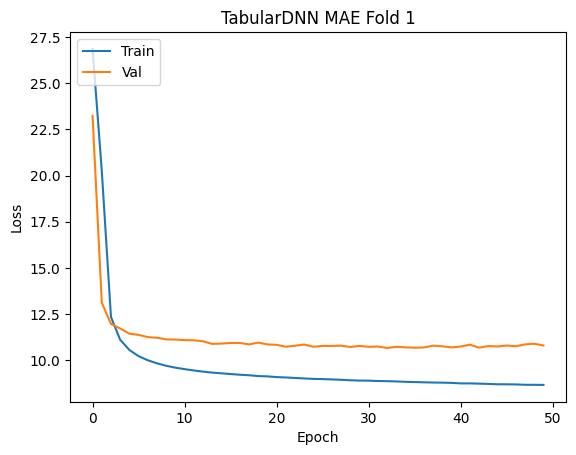

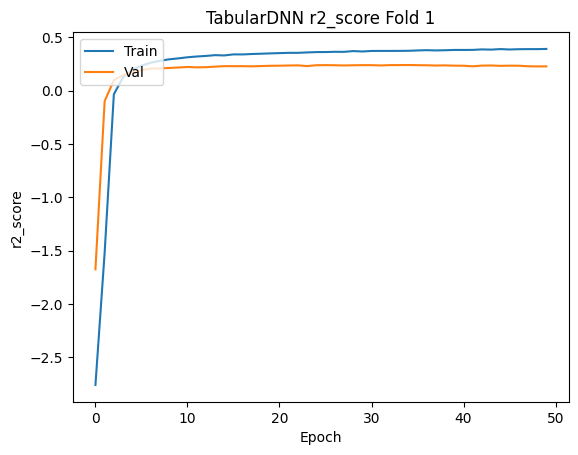

++++++++++++++++ Random Prediction ++++++++++++++++
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction: [[32.61244  20.78855  15.718562 16.25773 ]]
Target: [[15.  7. 14. 10.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++
========================= Fold 2 =========================
Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27.1087 - r2_score: -3.0481 - val_loss: 23.8389 - val_r2_score: -1.7877
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.1526 - r2_score: -1.8041 - val_loss: 15.4490 - val_r2_score: -0.4082
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.5628 - r2_score: -0.2373 - val_loss: 13.3731 - val_r2_score: -0.0673
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.4805 - r2_score: 0.0481 - val_loss: 12.3447 - val_r2_score: 0.0876
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 10.5414 - r2_score: 0.1561 - val_loss: 11.9477 - val_r2_score: 0.1455
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 10.3549

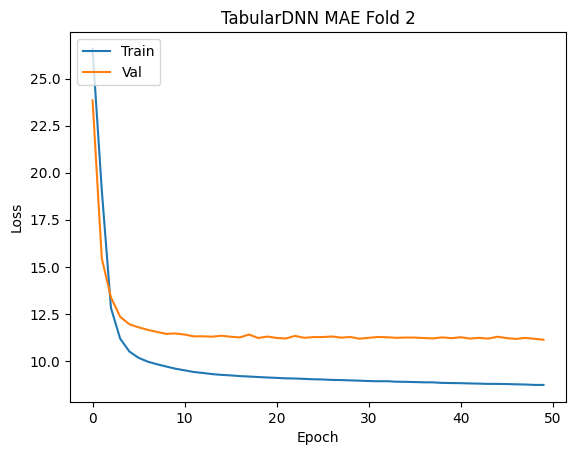

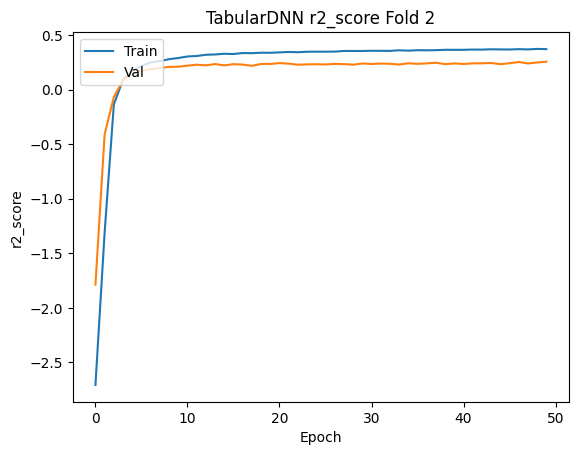

++++++++++++++++ Random Prediction ++++++++++++++++
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction: [[28.007725  24.994032  46.168716   8.0457325]]
Target: [[11. 11. 35. 16.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++
========================= Fold 3 =========================
Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 26.1069 - r2_score: -2.3973 - val_loss: 23.0577 - val_r2_score: -2.6406
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 20.5184 - r2_score: -1.3570 - val_loss: 12.7600 - val_r2_score: -0.3647
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 13.1364 - r2_score: -0.0949 - val_loss: 12.3989 - val_r2_score: -0.2711
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.6158 - r2_score: 0.1017 - val_loss: 12.8432 - val_r2_score: -0.3432
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 11.1133 - r2_score: 0.1713 - val_loss: 12.7504 - val_r2_score: -0.3270
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - los

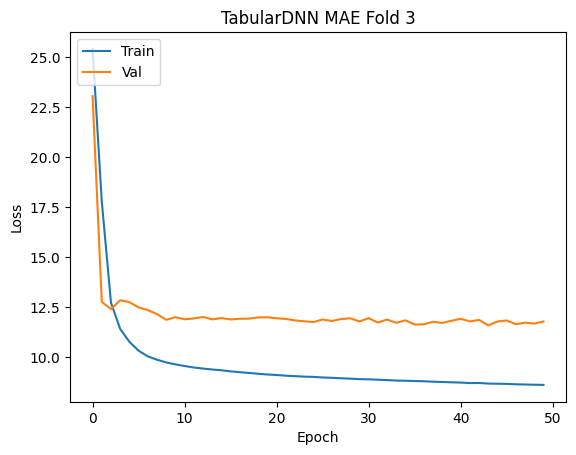

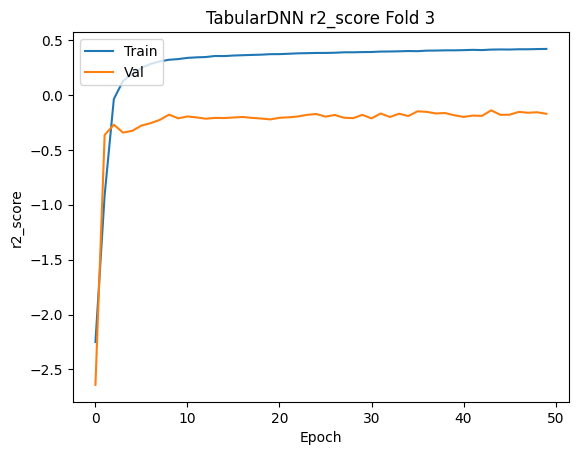

++++++++++++++++ Random Prediction ++++++++++++++++
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: [[16.447994 15.304674 19.671682 17.93345 ]]
Target: [[53. 44. 19. 27.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++
========================= Fold 4 =========================
Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 25.9342 - r2_score: -2.3634 - val_loss: 24.8367 - val_r2_score: -3.2986
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.6212 - r2_score: -1.6360 - val_loss: 15.3338 - val_r2_score: -0.9808
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 13.8637 - r2_score: -0.2430 - val_loss: 11.6854 - val_r2_score: -0.1190
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.5291 - r2_score: 0.0875 - val_loss: 10.3842 - val_r2_score: 0.0866
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.2260 - r2_score: 0.1668 - val_loss: 9.9097 - val_r2_score: 0.1334
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.0699 - 

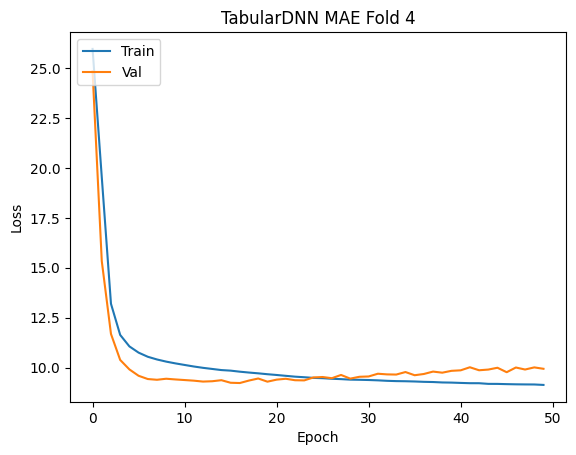

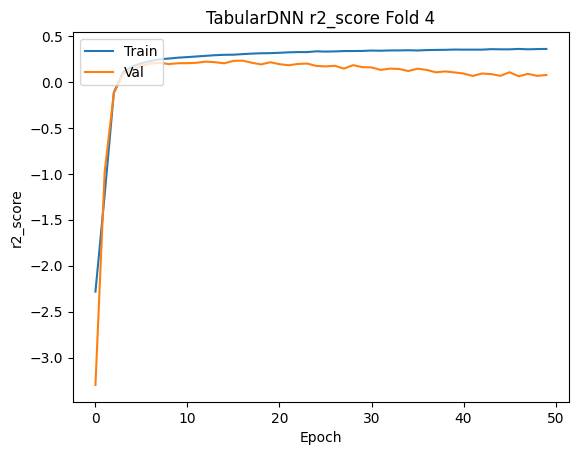

++++++++++++++++ Random Prediction ++++++++++++++++
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction: [[36.663616 38.26615  21.240982 41.45988 ]]
Target: [[40. 53. 35. 48.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++
========================= Fold 5 =========================
Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 26.3515 - r2_score: -2.4217 - val_loss: 24.4629 - val_r2_score: -2.1557
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 19.7166 - r2_score: -1.2395 - val_loss: 15.7075 - val_r2_score: -0.4627
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 12.7067 - r2_score: -0.0925 - val_loss: 12.8312 - val_r2_score: -0.0416
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.8342 - r2_score: 0.0791 - val_loss: 12.2306 - val_r2_score: 0.0299
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 11.1731 - r2_score: 0.1318 - val_loss: 11.8431 - val_r2_score: 0.0767
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 10.

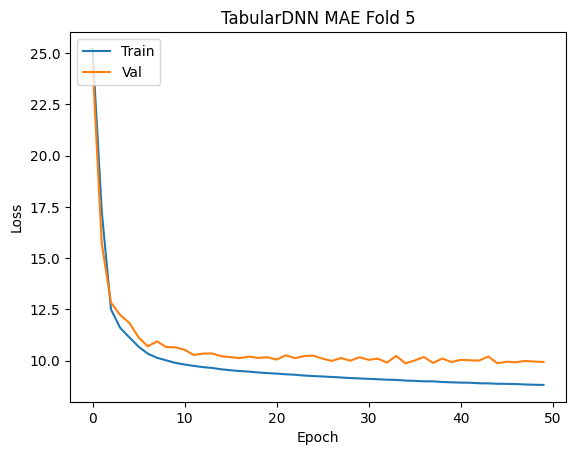

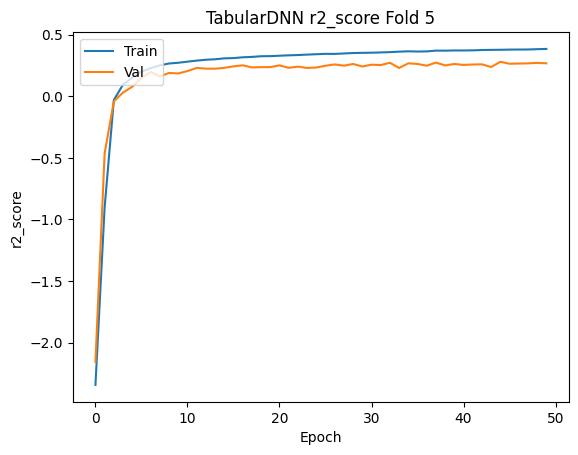

++++++++++++++++ Random Prediction ++++++++++++++++
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction: [[36.653587 25.891823 14.184615 23.39575 ]]
Target: [[24. 30. 19. 40.]]
+++++++++++++++++++++++++++++++++++++++++++++++++++


In [703]:
f = 1
pred_losses = []
pred_metrics = {}
for metric in perfMetrics:
    pred_metrics[metric] = []

readmeEntry += "## Plots \n\n"

kf = KFold(n_splits = 5)
for train_idx, test_idx in kf.split(input_df, output_df):
    print(f"========================= Fold {f} =========================")
    
    train_X = input_df.loc[train_idx]; train_Y = output_df.loc[train_idx]
    test_X = input_df.loc[test_idx]; test_Y = output_df.loc[test_idx]

    if(normMethod == "MinMax"):
        train_X = (train_X - train_X.min()) / (train_X.max() - train_X.max())
        test_X = (test_X - test_X.min()) / (test_X.max() - test_X.min())
    
    if(normMethod == "z-score"):
        train_X = (train_X - train_X.mean()) / train_X.std()
        test_X = (test_X - test_X.mean()) / test_X.std()

    # One-hot columns Normalization
    # for col in train_X.loc[:, "Clear":].columns:
    #     if(train_X[col].std() == 0):
    #         train_X.loc[:, col] = 1 / len(train_X)
    #     else:
    #         train_X.loc[:, col] = (train_X[col] - train_X[col].mean()) / train_X[col].std()

    # for col in test_X.loc[:, "Clear":].columns:
    #     if(test_X[col].std() == 0):
    #         test_X.loc[:, col] = 1 / len(test_X)
    #     else:
    #         test_X.loc[:, col] = (test_X[col] - test_X[col].mean()) / test_X[col].std()
    
    
    # In normalization because of one-hot there were some NaN values --> all zeros in one training group, all ones in testing group
    # This shows where is training we have NaN --> If we have NaN in training then we will have NaN loss in training!
    # print(train_X.columns[train_X.isnull().any()])
    # print(test_X.columns[test_X.isnull().any()])
    
    model = get_model()
    
    history = model.fit(
        train_X,
        train_Y,
        batch_size = batchSize,
        epochs = epochs,
        validation_data = (test_X, test_Y)
    )
    
    pred_eval = model.evaluate(test_X, test_Y)
    pred_loss = pred_eval[0]
    pred_losses.append(pred_loss)
    for i, val in enumerate(pred_eval[1:]):
        pred_metrics[perfMetrics[i]].append(val)

    time = str(datetime.now()).replace(" ", "-")
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title(f"TabularDNN {lossFunction} Fold {f}")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Val"], loc='upper left')
    plt.savefig(f"./results/plots/TabularDNN-{time}-Fold{f}-loss.png")
    readmeEntry += f"![image TabularDNN-Fold{f}-loss](./plots/TabularDNN-{time}-Fold{f}-loss.png)\n\n"
    plt.show()
    for metric in perfMetrics:
        plt.plot(history.history[metric])
        plt.plot(history.history[f"val_{metric}"])
        plt.title(f"TabularDNN {metric} Fold {f}")
        plt.ylabel(metric)
        plt.xlabel("Epoch")
        plt.legend(["Train", "Val"], loc='upper left')
        plt.savefig(f"./results/plots/TabularDNN-{time}-Fold{f}-{metric}.png")
        readmeEntry += f"![image TabularDNN-Fold{f}-{metric}](./plots/TabularDNN-{time}-Fold{f}-{metric}.png)\n\n"
        plt.show()

    readmeEntry += f"### Random Prediction Fold {f}\n\n"
    print("++++++++++++++++ Random Prediction ++++++++++++++++")
    idx = test_X.sample(1).index
    pred_y = model.predict(test_X.loc[idx])
    target_y = test_Y.loc[idx]
    print(f"Prediction: {pred_y}"); readmeEntry += f"#### Model Prediction Fold {f}: {pred_y}\n\n"
    print(f"Target: {target_y.values}"); readmeEntry += f"#### Model Target Fold {f}: {target_y.values}\n\n"
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++")

    f += 1

In [704]:
print(f"Loss: {np.mean(pred_losses)} ± {np.std(pred_losses)}")
readmeEntry += f"#### Model Prediction Loss: {np.mean(pred_losses)} ± {np.std(pred_losses)}\n\n"
for metric in perfMetrics:
    print(f"{metric}: {np.mean(pred_metrics[metric])} ± {np.std(pred_metrics[metric])}")
    readmeEntry += f"#### Model Prediction {metric}: {np.mean(pred_metrics[metric])} ± {np.std(pred_metrics[metric])}\n\n"

Loss: 10.71900234222412 ± 0.7085437418406293
r2_score: 0.1315695285797119 ± 0.16630071864659368


In [705]:
with open("./results/res.md", mode = "a", encoding = "utf-8") as f:
    f.write(readmeEntry)

In [706]:
# import xgboost

In [707]:
# i = 1
# kf = KFold(n_splits = 5)
# for train_idx, test_idx in kf.split(input_df, output_df):
#     print(f"========================= Fold {i} =========================")
    
#     train_X = input_df.loc[train_idx]; train_Y = output_df.loc[train_idx]
#     test_X = input_df.loc[test_idx]; test_Y = output_df.loc[test_idx]

#     # Z-score Normalization Label Encoding
#     train_X = (train_X - train_X.mean()) / train_X.std()
#     test_X = (test_X - test_X.mean()) / test_X.std()
    
#     model = xgboost.XGBRegressor(
#         eval_metric = ["error", "mae"],
#         objective = "reg:absoluteerror"
#     )
    
#     model.fit(
#         train_X,
#         train_Y,
#         eval_set = [(train_X, train_Y), (test_X, test_Y)],
#     )

#     res = model.evals_result()
#     train_err, train_mae = res["validation_0"]["error"], res["validation_0"]["mae"]
#     test_err, test_mae = res["validation_1"]["error"], res["validation_1"]["mae"]
#     epochs = len(train_err)
    
#     plt.plot(range(0, epochs), train_err)
#     plt.plot(range(0, epochs), test_err)
#     plt.title(f"XGBoost Error Fold {i}")
#     plt.ylabel("Error")
#     plt.xlabel("Epoch")
#     plt.legend(["Train", "Test"], loc = "upper left")
#     plt.show()

#     plt.plot(range(0, epochs), train_mae)
#     plt.plot(range(0, epochs), test_mae)
#     plt.title(f"XGBoost MAE Fold {i}")
#     plt.ylabel("MAE")
#     plt.xlabel("Epoch")
#     plt.legend(["Train", "Test"], loc = "upper left")
#     plt.show()

#     print("++++++++++++++++ Random Prediction ++++++++++++++++")
#     idx = test_X.sample(1).index
#     pred_y = model.predict(test_X.loc[idx])
#     target_y = test_Y.loc[idx]
#     print(f"Prediction: {pred_y}")
#     print(f"Target: {target_y.values}")
#     print("+++++++++++++++++++++++++++++++++++++++++++++++++++")

#     i += 1